In [1]:
#подключаем библиотеки
import numpy as np
from sympy import *
# from sympy.solvers import solve
# from sympy.plotting.intervalmath import interval
from prettytable import PrettyTable
from mpmath import findroot

In [2]:
#заполняем матрицы
a = Symbol("a", real=True)
M = []
for i in range(2, 10):
    row = [a for _ in range(i)]
    m = Matrix([row for _ in range(i)])
    for j in range(i):
        m[j, j] = 1
    M.append(m)

In [3]:
#считаем их определители
for i, m in enumerate(M):
    d = m.det()
    print('n =' + str (i + 2), d)

n =2 1 - a**2
n =3 2*a**3 - 3*a**2 + 1
n =4 -3*a**4 + 8*a**3 - 6*a**2 + 1
n =5 4*a**5 - 15*a**4 + 20*a**3 - 10*a**2 + 1
n =6 -5*a**6 + 24*a**5 - 45*a**4 + 40*a**3 - 15*a**2 + 1
n =7 6*a**7 - 35*a**6 + 84*a**5 - 105*a**4 + 70*a**3 - 21*a**2 + 1
n =8 -7*a**8 + 48*a**7 - 140*a**6 + 224*a**5 - 210*a**4 + 112*a**3 - 28*a**2 + 1
n =9 8*a**9 - 63*a**8 + 216*a**7 - 420*a**6 + 504*a**5 - 378*a**4 + 168*a**3 - 36*a**2 + 1


In [ ]:
e = Symbol("eps", real=True)
left = [1-e**2,
     1 -3*e**2,
     -3*e**4-6*e**2+1,
     -15*e**4-10*e**2+1,
     -5*e**6-45*e**4-15*e**2+1,
     -35*e**6-105*e**4-21*e**2+1,
     -7*e**8-140*e**6-210*e**4-28*e**2+1,
     -63*e**8-420*e**6-378*e**4-36*e**2+1]
right = [1,     
     1+e**3,    
     8*e**3+1,         
     4*e**5+20*e**3+1, 
     24*e**5+40*e**3+1, 
     6*e**7+84*e**5+70*e**3+1, 
     48*e**7+224*e**5+112*e**3+1,
    8*e**9+216*e**7+504*e**5+168*e**3+1]

In [4]:
x = PrettyTable()
x.field_names = ["N", "1 / (N - 1)", "eps*", "delta"]

In [5]:
estimate = []
for i in range(7):
    val1 = 1/(i + 1)
    val2 = findroot(lambda x: left[i].evalf(subs={e:x}), 0.2)
    v1 = float('{:.3f}'.format(val1))
    v2 = float('{:.3f}'.format(round(val2, 4)))
    v3 = float('{:.3f}'.format(round(val2-val1, 4)))
    estimate.append(v3)
    x.add_row([i + 2, v1, v2, v3])
    print(i + 2, ': [', left[i], '; ', right[i], ']')

2 : [ 1 - eps**2 ;  1 ]
3 : [ 1 - 3*eps**2 ;  eps**3 + 1 ]
4 : [ -3*eps**4 - 6*eps**2 + 1 ;  8*eps**3 + 1 ]
5 : [ -15*eps**4 - 10*eps**2 + 1 ;  4*eps**5 + 20*eps**3 + 1 ]
6 : [ -5*eps**6 - 45*eps**4 - 15*eps**2 + 1 ;  24*eps**5 + 40*eps**3 + 1 ]
7 : [ -35*eps**6 - 105*eps**4 - 21*eps**2 + 1 ;  6*eps**7 + 84*eps**5 + 70*eps**3 + 1 ]
8 : [ -7*eps**8 - 140*eps**6 - 210*eps**4 - 28*eps**2 + 1 ;  48*eps**7 + 224*eps**5 + 112*eps**3 + 1 ]


In [6]:
print(x)

+---+-------------+-------+-------+
| N | 1 / (N - 1) |  eps* | delta |
+---+-------------+-------+-------+
| 2 |     1.0     |  1.0  |  0.0  |
| 3 |     0.5     | 0.577 | 0.077 |
| 4 |    0.333    | 0.393 |  0.06 |
| 5 |     0.25    | 0.297 | 0.047 |
| 6 |     0.2     | 0.238 | 0.038 |
| 7 |    0.167    | 0.199 | 0.033 |
| 8 |    0.143    | 0.171 | 0.028 |
+---+-------------+-------+-------+


Text(0, 0.5, 'eps* - 1/(N-1)')

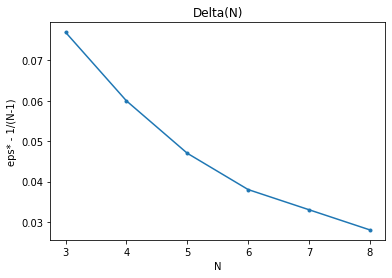

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


x = [i for i in range(3, 9)]
y = estimate[1:]
plt.plot(x, y, '.-')
plt.title('Delta(N)')

plt.xlabel('N')
plt.ylabel('eps* - 1/(N-1)')

# plt.plot(x2, y2)